In [10]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score
import math
from scipy.stats import norm

In [11]:
df = pd.read_csv('/Users/vzogh/APMAE4990-/data/AmesHousingblanksremoved.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Enclosed Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,NaN,Reg,Lvl,...,0,120,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,NaN,IR1,Lvl,...,0,0,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [12]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2440.000000,2.440000e+03,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2423.000000,...,2439.000000,2439.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000
mean,1471.819672,7.164568e+08,57.772541,69.224590,9709.522951,6.096721,5.568443,1970.521721,1984.447541,99.834090,...,1.748257,469.299303,88.948770,47.131148,23.659426,16.040574,44.131557,6.233197,2007.784836,180099.741803
std,851.493536,1.886854e+08,43.598248,23.365335,6424.124499,1.450449,1.102491,31.542866,21.372267,180.032761,...,0.783712,222.025761,120.656345,68.230706,64.372640,56.186895,501.324345,2.730953,1.323153,83485.422187
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,730.500000,5.284771e+08,20.000000,58.000000,7225.250000,5.000000,5.000000,1950.000000,1964.000000,0.000000,...,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,127500.000000
50%,1473.500000,5.354571e+08,50.000000,68.000000,9248.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,...,2.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,157500.000000
75%,2203.250000,9.071870e+08,70.000000,80.000000,11207.750000,7.000000,6.000000,2003.000000,2004.000000,157.500000,...,2.000000,576.000000,168.000000,68.250000,0.000000,0.000000,0.000000,8.000000,2009.000000,212350.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,5.000000,1488.000000,870.000000,742.000000,1012.000000,576.000000,17000.000000,12.000000,2010.000000,755000.000000


In [13]:
df_converted = pd.get_dummies(df)
df_converted.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141,31770,6,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,80,11622,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,81,14267,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,93,11160,7,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,74,13830,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
df_filled=df_converted.fillna(0)

X=df_filled.drop(['SalePrice'],1)
y = df_filled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def getDummy(df):
    df=pd.get_dummies(df)
    return df

# One Hot Encoding
X_train=getDummy(X_train)
X_test=getDummy(X_test)

# Perform Lasso to remove less performing variables
lasso = Lasso()

lasso.fit(X_train,y_train)

X_train=X_train.iloc[:,lasso.coef_!=0]
X_test=X_test.iloc[:,lasso.coef_!=0]
lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))

C:\Users\vzogh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training set score: 0.94
Test set score: 0.92
Number of features used: 263


C:\Users\vzogh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5,1,'Lasso Coefficients Regularization')

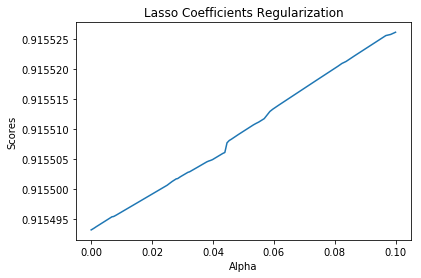

In [15]:
#Finding regularization strength optimizing R^2
alphas = np.logspace(-8, -1, 1000)
train_errors=[]
test_errors=[]
coefs_lasso=[]
scores_lasso=[]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    train_errors.append(lasso.score(X_train,y_train))
    scores_lasso.append(lasso.score(X_test,y_test))
    coefs_lasso.append(lasso.coef_)

plt.plot(alphas,scores_lasso)
alpha_opt_reg=alphas[np.argmax(scores_lasso)]

plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Lasso Coefficients Regularization')

In [16]:
y_pred = lasso.predict(X_test)
# The mean square error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
#R^2 score
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 589388613.42
R^2 score: 0.92


In [17]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

print('MAE:\t$%.2f' % mean_absolute_error(y_test, y_pred))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))

MAE:	$15339.00
MSLE:	0.02409
